In [1]:
import umap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [3]:
# Load Data + View Head
# Drop Na + Show Value Counts
# Pairplots on column
# UMAP on fitted data

In [4]:
class Visualizer():
    def __init__(self, data):
        self.data = data
        self.reducer = umap.UMAP()
        print(self.data.head())
    def initial_processing(self):
        self.data.dropna()
        return self.data.author_id.value_counts()
    def get_plots(self, axis):
        # Pair Plot
        sns.pairplot(self.data.drop('year', axis=1), hue=axis);
    def get_embeddings(self, scaled_data):
        self.embeddings = self.reducer.fit_transform(scaled_data)
        print('Shape: ',self.embeddings.shape)
        return self.embeddings
    def get_UMAP(self, params, mapping, key):
        data_values = self.data[params].values
        scaled_values = StandardScaler().fit_transform(data_values)
        embedding = self.get_embeddings(scaled_values)
        plt.scatter(
            embedding[:, 0],
            embedding[:, 1],
            c = [sns.color_palette()[x] for x in self.data[key].map(mapping)]
        )
        plt.gca().set_aspect('equal', 'datalim')
        plt.title('UMAP projection of the Penguin dataset', fontsize=24);

In [5]:
penguins = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/inst/extdata/penguins.csv")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [6]:
penguins = penguins.dropna()
penguins.species.value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

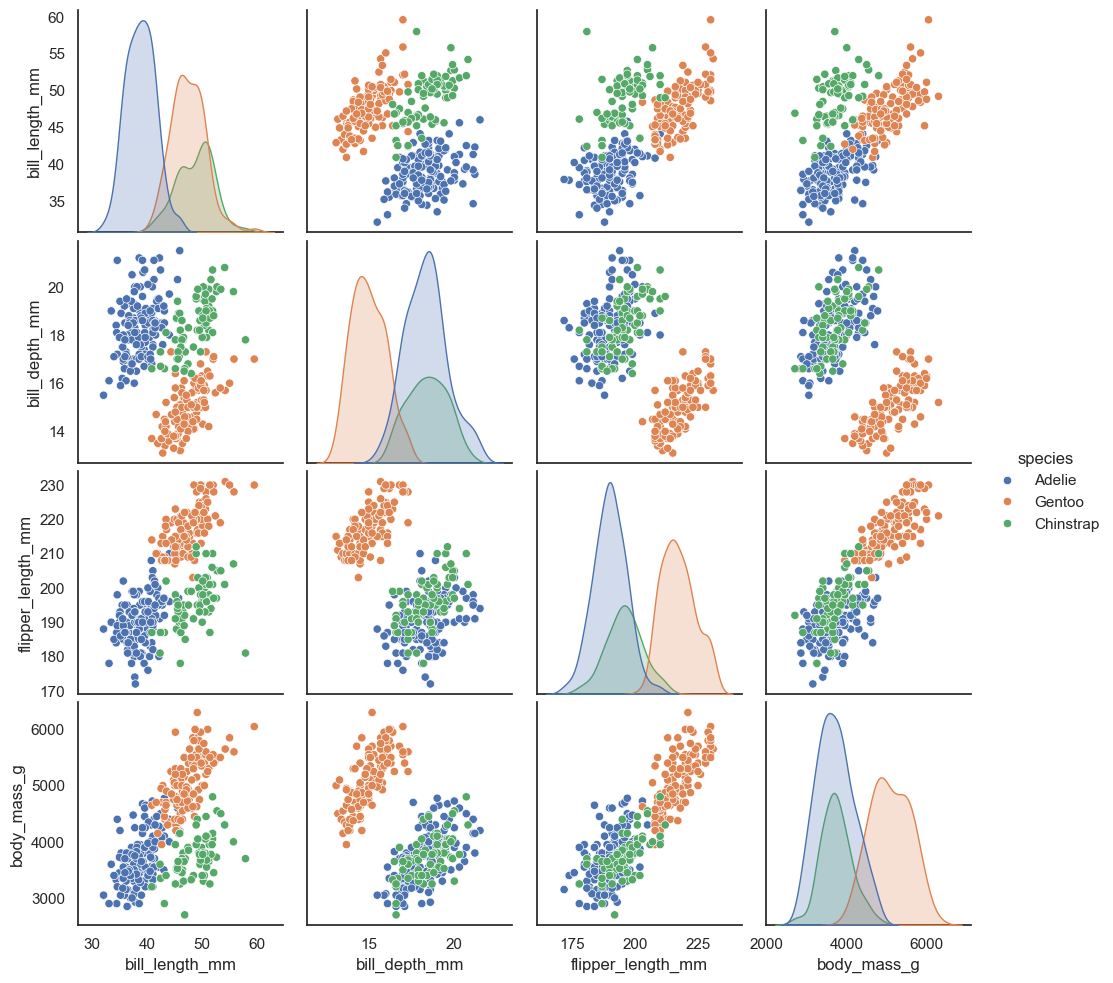

In [7]:
sns.pairplot(penguins.drop("year", axis=1), hue='species');

In [8]:
reducer = umap.UMAP()

In [9]:
penguin_data = penguins[
    [
        "bill_length_mm",
        "bill_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)

In [10]:
embedding = reducer.fit_transform(scaled_penguin_data)
embedding.shape

/opt/homebrew/lib/python3.11/site-packages/umap/spectral.py:227: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  warn(


(333, 2)

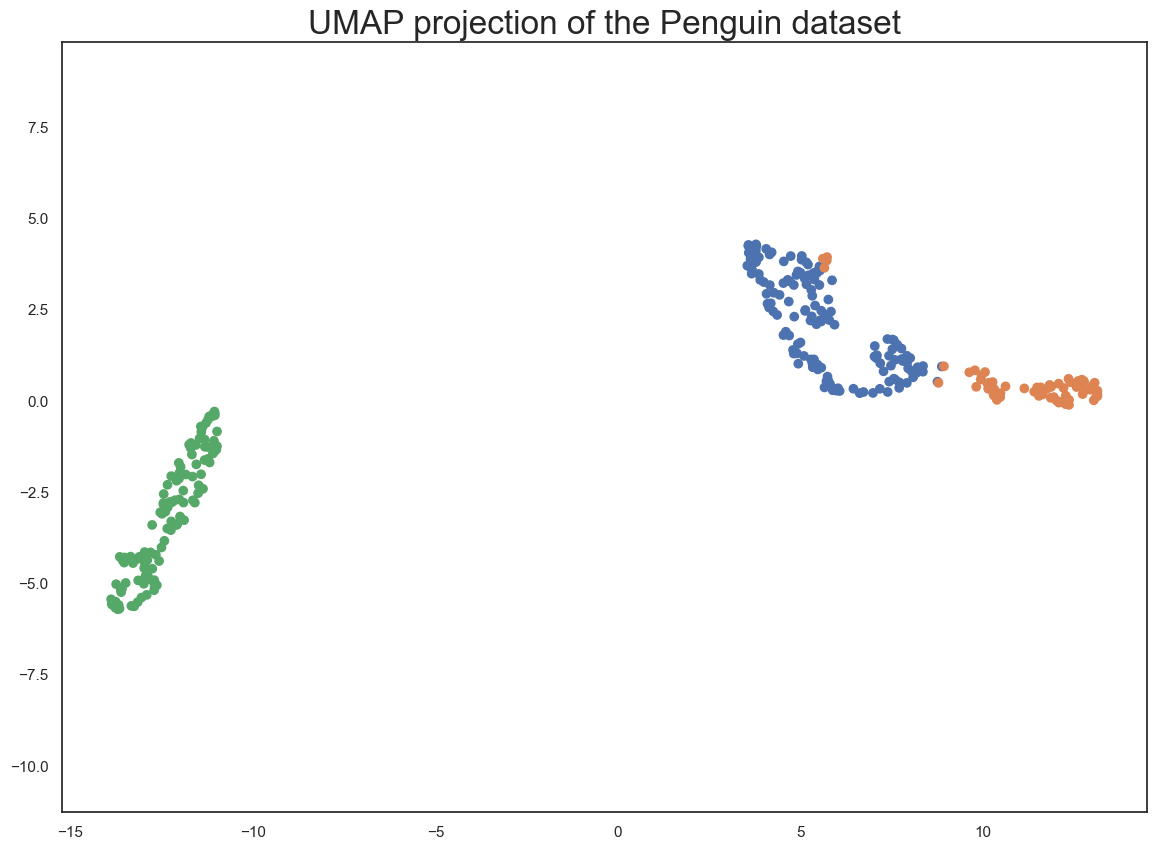

In [11]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24);

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
4       3450.0  female  2007  
5       3650.0    male  2007  


/opt/homebrew/lib/python3.11/site-packages/umap/spectral.py:227: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  warn(


Shape:  (333, 2)


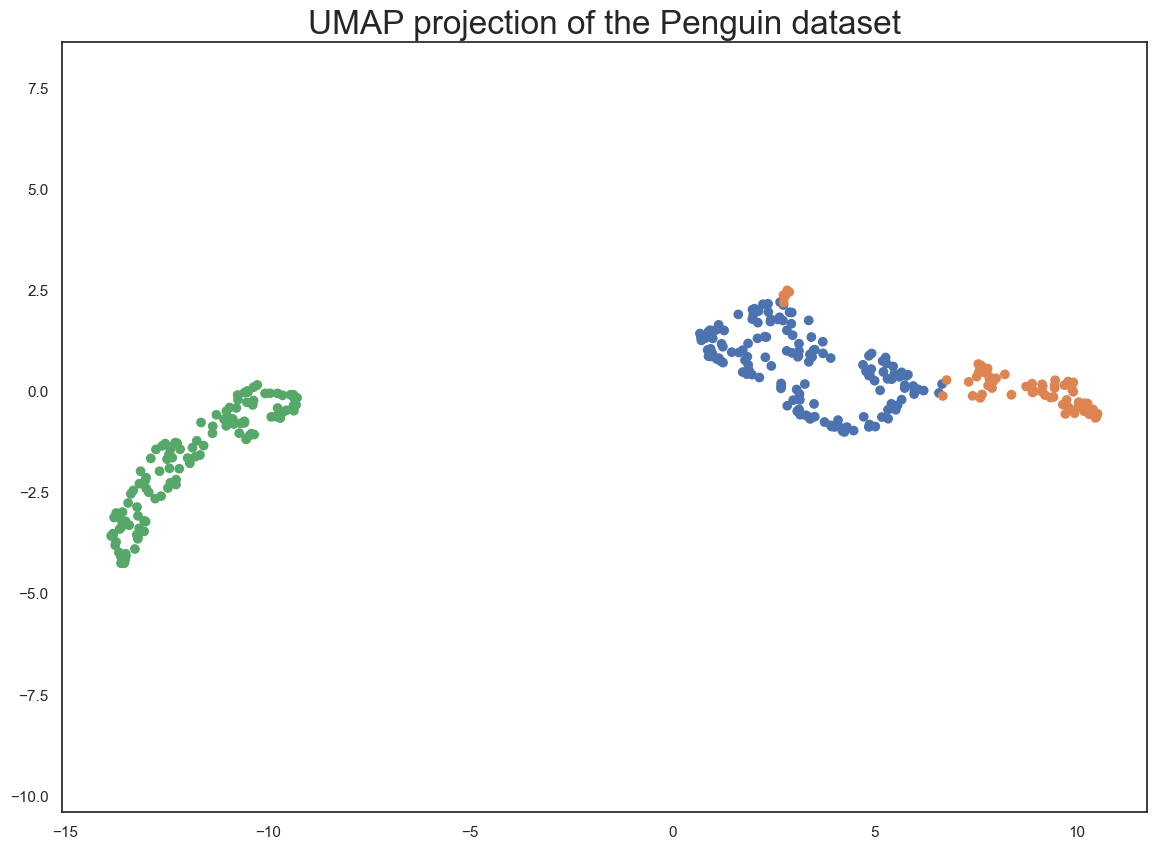

In [12]:
vis = Visualizer(penguins).get_UMAP([
        "bill_length_mm",
        "bill_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ],
    {"Adelie":0, "Chinstrap":1, "Gentoo":2}, 'species')